In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/dataset.csv")

#### CORRELATIONS

In [3]:
numerical_cols = df.select_dtypes(include='number').columns

In [4]:
df[numerical_cols].corrwith(df['popularity']).abs().sort_values(ascending=False)

popularity          1.000000
instrumentalness    0.095139
loudness            0.050423
speechiness         0.044927
valence             0.040534
danceability        0.035448
Unnamed: 0          0.032142
time_signature      0.031073
acousticness        0.025472
mode                0.013931
tempo               0.013205
duration_ms         0.007101
liveness            0.005387
key                 0.003853
energy              0.001056
dtype: float64

In [5]:
for col in df.columns:
    print(df.groupby(col).popularity.agg('mean').sort_values(ascending=False).head(5))
    print("------//------\n")

Unnamed: 0
81051    100.0
20001    100.0
51664     99.0
89411     98.0
30003     98.0
Name: popularity, dtype: float64
------//------

track_id
3nqQXoyQOWXiESFLlDF1hG    100.0
2tTmW7RDtMQtBk7m2rYeSw     99.0
5ww2BF9slyYgNOk37BlC4u     98.0
4uUG5RXrOk84mYEfFvj3cK     98.0
1IHWl5LamUGEuP4ozKQSXZ     97.0
Name: popularity, dtype: float64
------//------

artists
Sam Smith;Kim Petras          100.0
Bizarrap;Quevedo               99.0
Manuel Turizo                  98.0
Bad Bunny;Chencho Corleone     97.0
Bad Bunny;Bomba Estéreo        94.5
Name: popularity, dtype: float64
------//------

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
Indigo (Extended)                                                       96.0
Name: populari

#### FEATURE CLEANING

In [6]:
# columns to drop fromd dataset
cols_to_drop = [
    'Unnamed: 0',
    'track_id',
    'track_name',
    'album_name',
]

In [7]:
# drop id-type columns not to be used in model training
df = df.drop(columns=cols_to_drop)

In [8]:
# drop duplicated entries
df = df.drop_duplicates()

In [9]:
# remove nans from dataset
df = df.dropna()

#### FEATURE ENGINEERING

In [10]:
# convert explicit column bool to numeric
df["explicit"] = df["explicit"].astype(int)

In [11]:
# Engineered numeric features based
df["hype_score"] = df["energy"] * df["danceability"]
df["acoustic_softness"] = df["acousticness"] + df["instrumentalness"]
df["duration_min"] = df["duration_ms"] / 60000
df["beats_per_sec"] = df["tempo"] / 60
df["is_high_energy"] = (df["energy"] > 0.7).astype(int)

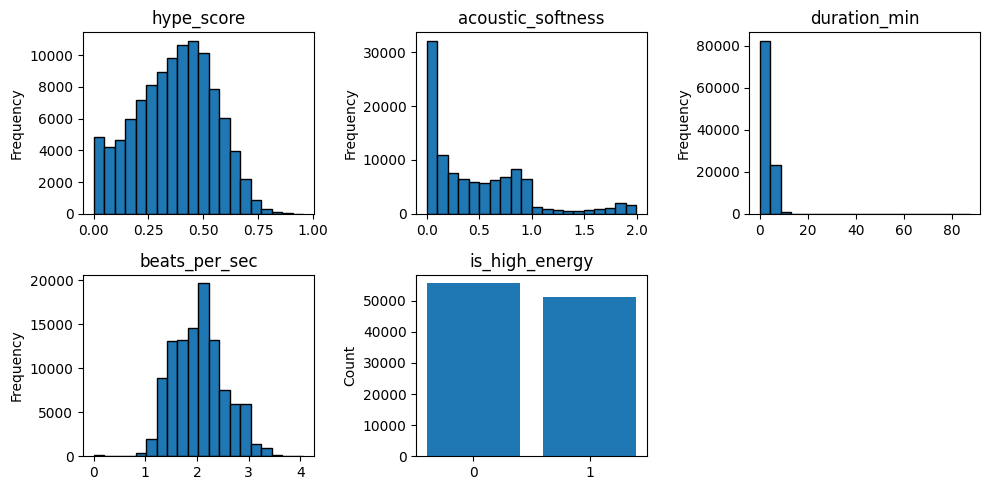

In [21]:
# List of engineered features
features = ["hype_score", "acoustic_softness", "duration_min", "beats_per_sec", "is_high_energy"]


# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

# Flatten axes array for easy indexing (in case of a single row)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    if df[feature].nunique() <= 2:  # Binary feature
        counts = df[feature].value_counts().sort_index()
        ax.bar(counts.index.astype(str), counts.values,)
        ax.set_ylabel("Count")
    else:  # Numeric feature
        ax.hist(df[feature], bins=20, edgecolor='black')
        ax.set_ylabel("Frequency")
    ax.set_title(f"{feature}")

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
# save clean dataset with new features
df.to_csv("../data/dataset_fe.csv", index=False)